# Capstone Project - The Battle of Neighborhoods

Coursera Capstone Project: <b>The Battle of Neighborhoods</b>

## Table of contents
1. Introduction
- Data
- Methodology
- Exploratory Data Analysis
- Results
- Discussion
- Conclusion

## 1. Introduction

California's second largest city and the United States' eighth largest, San Diego boasts a citywide population of nearly 1.3 million residents and more than 3 million residents countywide. Within its borders of 4,200 sq. miles, San Diego County encompasses 18 incorporated cities and numerous other charming neighborhoods and communities, including downtown's historic Gaslamp Quarter, Little Italy, Coronado, La Jolla, Del Mar, Carlsbad, and Chula Vista just to name a few. 

San Diego is renowned for its idyllic climate, 70 miles of pristine beaches and a dazzling array of world-class family attractions. Popular attractions include the world-famous San Diego Zoo and San Diego Zoo Safari Park, SeaWorld San Diego and LEGOLAND California. The sunny weather makes San Diego a hot spot for vacationers of all ages from around the world. 

But the city is not only about tourism and beach holidays. Thanks to the spirit of collaboration, plenty of qualified employees, and favorable conditions for entrepreneurship, San Diego is a good city to start a business. 

The economy of the San Diego county region is going strong. San Diego, having GDP of over $250 million, made it to the top 20 major cities in the United States.

Being so attractive economically and geographically, San Diego draws in people like a magnet. Business owners often consider San Diego city as a good destination for moving and expanding their business because of housing and low cost of doing business as compared to Los Angeles and San Francisco areas. Also, its year-around good weather tremendously helps small businessess that rely on foot traffic.

As a resident of this city, I decided to use San Diego in my project.

### 1.1 Business Problem

As <b>San Diego</b> receives people from all around the world, and people love to try new food, we will try to find an adequate location for opening up an <b><i>Italian Restaurant</i></b> in <b>San Diego</b>. Finding a proper location for a restaurant is crucial for business success. Hence, to select the right location for the restaurant, we will consider following elements:

1. <b>Know the neighborhood</b>, specifically, who else is doing business in the neighborhood 
- <b>Find a place which is not crowded with similar restaurants in vicinity</b>
- <b>Accessibility and visibility</b> of the location
- <b>Population base</b> to know the foot traffic or car traffic in the area to support the business
- <b>Parking</b> for the customers, and 
- <b>Low crime rate</b> in the area as high crime rates can make potential customers uncomfortable to visit the restaurant due to fears over public safety.

Our objective is to discover <b>a few most promissing neighborhoods</b> based on above-mentioned criteria using data science skills, and present them with statistics so that the stakeholders can select the precise location for their restaurant.

### 1.2 Interest

Our target stakeholders are the <b>restaurant entrepreneurs</b> who would be interested in starting a restaurant in San Diego, California.

## 2. Data

To address the problem, we can list the required datas as below:
1. I have scraped San Diego neighborhoods data from wikipedia (https://en.wikipedia.org/wiki/Template:Neighborhoods_of_San_Diego) uisng '<b>BeautifulSoup</b>' library and processed the data in order to use this in this project.
- Python <b>geopy</b> library is used to obtain the <b>geographical coordinates of San Diego</b> and other addresses of interest.
-  <b>Forsquare API</b> is used to get the most common <b>venues of given Neighborhoods of San Diego</b>.
- I have collected some demographical information as well as property facts data such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>, <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> for each location of interest from below links:
    - https://www.niche.com/places-to-live/c/san-diego-county-ca/
    - https://www.trulia.com/CA/San_Diego/

## 3. Methodology

I have used
- python <b>geopy</b> library to obtain the <b>geographical coordinates of San Diego</b>.
- the <b>Foursquare API</b> to segement and explore the neighborhoods as well as the latitude and logitude coordinates of each neighborhood. For this, I have set the limit as 100 and the radius 1000 meter for each neighborhood from their given latitude and longitude informations. 
- the <b>Folium</b> library to visualize the neighborhoods in San Diego with neighborhoods superimposed on top.
- the <b>explore</b> function to get the most common venue categories in each neighborhood and then used this feature to group the neighborhoods into clusters with the help of <b><i>K</i>-means clustering</b> algorithm. 
- the <b>Folium</b> library to visualize the neighborhoods in San Diego and their emerging clusters.
- the demographical as well as property facts data about San Diego neigborhoods to rate them based on these data, and merge them with related clusters of neighborhoods.
- the <b>Folium</b> library to visualize final selected locations for opening up a restaurant based on the criteria mentioned in the section-1.1.

## 4. Exploratory Data Analysis

### A. Import required libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.ticker import FuncFormatter
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cluster import KMeans # machine learning library
import folium # map rendering library
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

print("Libraries imported.")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Libraries imported.


### B. Import and explore Dataset

#### Load the data

In order to segement the neighborhoods and explore them, we will essentially need a dataset containing neighborhoods in San Diego as well as the latitude and logitude coordinates of each neighborhood.

In [2]:
# Inport the dataset into pandas dataframe
sd_df = pd.read_csv("../data/sd_neighborhoods.csv", engine='python')
sd_df.head()

,Neighborhoods,Address,Location,Coordinates,Latitude,Longitude
0,Bay Ho,"Bay Ho,San Diego,CA","San Diego, Casablanca, Regla, La Habana, La Ha...","(32.8241, -117.1937, 0.0)",32.824100,-117.193700
1,Bay Park,"Bay Park,San Diego,CA","Bay Park, San Diego, San Diego County, Califor...","(32.7846385, -117.2026047, 0.0)",32.784638,-117.202605
2,Carmel Valley,"Carmel Valley,San Diego,CA","Carmel Valley, San Diego, San Diego County, Ca...","(32.9434337, -117.2139794, 0.0)",32.943434,-117.213979
3,Clairemont,"Clairemont,San Diego,CA","Clairemont, San Diego, San Diego County, Calif...","(32.8195052, -117.1823399, 0.0)",32.819505,-117.182340
4,Del Mar Heights,"Del Mar Heights,San Diego,CA","Del Mar Heights, San Diego, San Diego County, ...","(32.9488105, -117.250785, 0.0)",32.948811,-117.250785


In [3]:
# create a new dataframe with related data
sd_neighborhoods = sd_df[['Neighborhoods', 'Latitude', 'Longitude']]
sd_neighborhoods.head()

,Neighborhoods,Latitude,Longitude
0,Bay Ho,32.824100,-117.193700
1,Bay Park,32.784638,-117.202605
2,Carmel Valley,32.943434,-117.213979
3,Clairemont,32.819505,-117.182340
4,Del Mar Heights,32.948811,-117.250785


#### Data Pre-processing

Check if dataset has any missing value.

In [4]:
# Get the info
sd_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhoods  121 non-null    object 
 1   Latitude       107 non-null    float64
 2   Longitude      107 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


We can observe that the column <b>Latitude</b> and <b>Longitude</b> have <b>$14$</b> missing values.

In [6]:
# Handling the missing value
# drop rows with missing values
sd_neighborhoods.dropna(axis=0, how ='any')
sd_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 120
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhoods  107 non-null    object 
 1   Latitude       107 non-null    float64
 2   Longitude      107 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [7]:
# Get the number of neighborhoods
print("Number of neighborhoods: {}".format(len(sd_neighborhoods['Neighborhoods'].unique())))

Number of neighborhoods: 107


#### Create a map of San Diego with neighborhoods superimposed on top

We have used <b>geopy</b> library to get the latitude and longitude values of <b>San Diego</b> City. Then, we have created map of <b>San Diego</b> using latitude and longitude values with <b>neighborhoods</b> superimposed on top.

In [8]:
# get the latitude and longitude values of San Diego
address = 'San Diego, CA'

# define an instance of the geocoder
geolocator = Nominatim(user_agent='sd')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of San Diego are: {}, {}.".format(latitude, longitude))

The geographical coordinates of San Diego are: 32.7174202, -117.1627728.


In [14]:
# create map of San Diego using latitude and longitude values
sd_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(sd_neighborhoods['Latitude'], sd_neighborhoods['Longitude'], sd_neighborhoods['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(sd_map)

# display the map
sd_map

In [ ]:
# fig.write_image("../images/fig1.png")

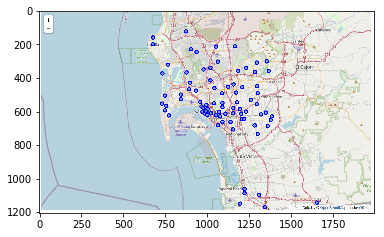

In [28]:
import matplotlib.image as mpimg
image = mpimg.imread("../images/fig1_sd_map.png")
plt.imshow(image)
plt.show()

### C. Explore Neighborhoods in San Diego

I have used the <b>Foursquare API</b> to explore the neighborhoods and segment them. I set the limit as 100 venue and the radius 1000 meter for each neighborhood from their given latitude and longitude value. We have written two functions - <b>get_category</B>() to extract the category of the venue, and <b>get_nearby_venues</b>() to get all the nearby venues in the neighborhoods. Then, we have converted relevant data into a pandas dataframe containing 
columns - <b>Neighborhood</b>, <b>Neighborhood_Lat</b>, <b>Neighborhood_Lng</b>, <b>Venue</b>, <b>Venue_Lat</b>, <b>Venue_Lng</b>, <b>Venue_Category</b>.

##### Define Foursquare Credentials and Version

In [29]:
# Define Foursquare Credentials and Version
client_id = '' # Foursquare ID
client_secret = '' # Foursquare Secret
access_token = '' # Foursquare Access Token
version = '20180604'
limit = 100

# Print Credentials
# print('Foursquare Credentials:')
# print('CLIENT_ID: ', client_id)
# print('CLIENT_SECRET: ', client_secret)

In [30]:
# function that extracts the category of the venue
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
# function to get all the nearby venues in the neighborhoods in San Diego
def get_nearby_venues(names, latitudes, longitudes, radius=1000):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
        
        # create the API request URL 
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            lat, 
            lng, 
            version, 
            radius, 
            limit)
        
        # make the GET request
        venues = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['name'],
            v['location']['lat'],
            v['location']['lng'],
            v['categories']) for v in venues])
        
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods',
                            'Neighborhood_Lat',
                            'Neighborhood_Lng',
                             'Venue',
                             'Venue_Lat',
                             'Venue_Lng',
                             'Venue_Category']
    
    # call helper function venue_category() to filter the category for each row (axis=1)
    nearby_venues['Venue_Category'] = nearby_venues.apply(venue_category, axis=1)
    return nearby_venues

# function that extracts the category of the venue
def venue_category(row):
    
    categories_list = row['Venue_Category']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Call the function <b>get_nearby_venues()</b> to get all the nearby venues in each neighborhood in San Diego

In [33]:
# call the function get_nearby_venues() to get all the nearby venues in San Diego Neighborhoods
venues_in_sd = get_nearby_venues(names=sd_neighborhoods['Neighborhoods'],
                                   latitudes=sd_neighborhoods['Latitude'],
                                   longitudes=sd_neighborhoods['Longitude']
                                  )

# Display the dataframe
venues_in_sd.head()

,Neighborhoods,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.8241,-117.1937,Mt. Etna Neighborhood Park,32.822739,-117.191499,Playground
1,Bay Ho,32.8241,-117.1937,John Muir Language Academy,32.823418,-117.193544,Elementary School
2,Bay Ho,32.8241,-117.1937,Hurst Dental Care,32.826343,-117.190943,Dentist's Office
3,Bay Ho,32.8241,-117.1937,QLP Locksmith,32.822519,-117.183990,Locksmith
4,Bay Ho,32.8241,-117.1937,Circle K,32.822577,-117.183807,Convenience Store


Let's get the total number of venues returned by Foursquare.

In [34]:
print('Total {} venues ere returned by Foursquare.'.format(venues_in_sd.shape[0]))

Total 10282 venues ere returned by Foursquare.


Let's get the number of venues returned for each neighborhood and plot a barchart with the result.

In [35]:
# get the number of venues returned for each neighborhood and plot it
venues_by_neighborhoods = venues_in_sd['Neighborhoods'].value_counts().rename_axis('Neighborhoods').reset_index(name='Venue Counts')
print(venues_by_neighborhoods.head())
print('')
print(venues_by_neighborhoods.tail())

     Neighborhoods  Venue Counts
0       Alta Vista           100
1     City Heights           100
2  Sorrento Valley           100
3           Lomita           100
4      Balboa Park           100

        Neighborhoods  Venue Counts
102  Rancho Encantada            72
103        San Carlos            68
104        Point Loma            64
105              Core            35
106        Burlingame            33


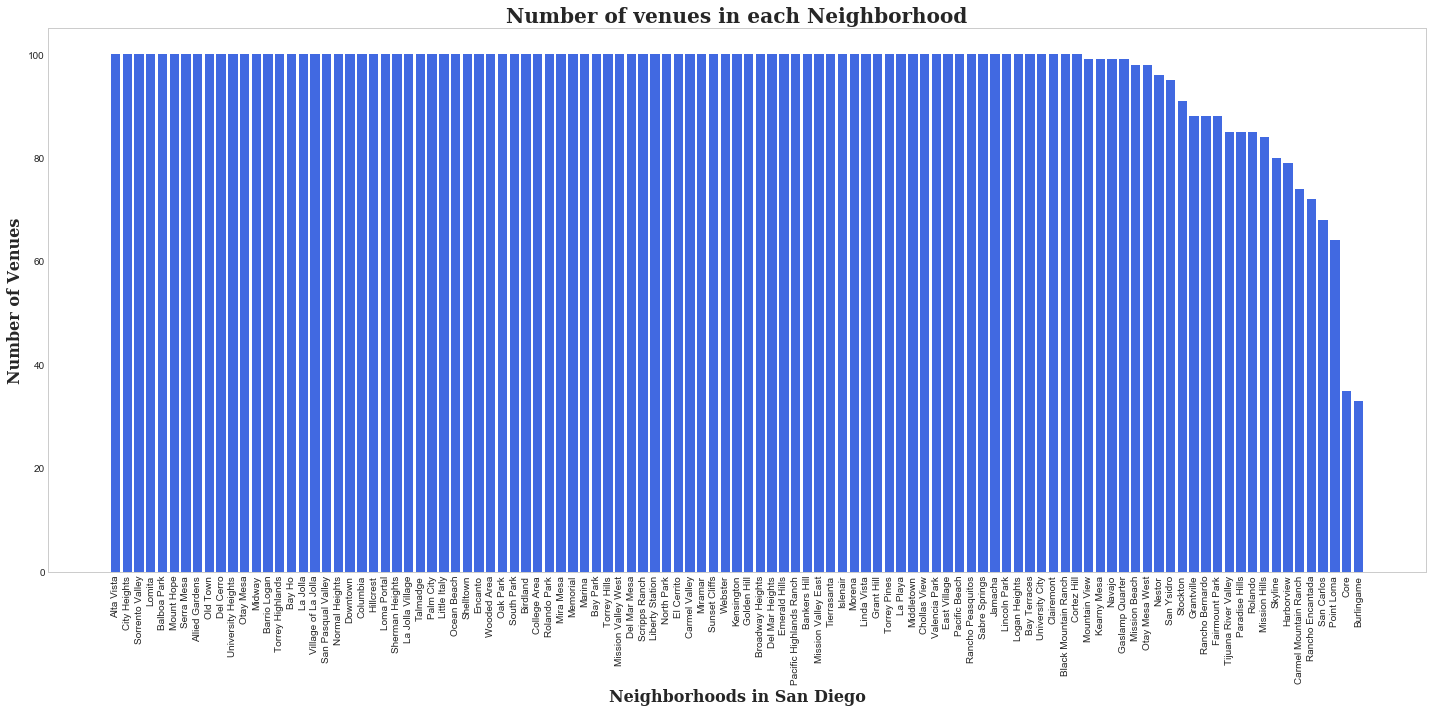

In [36]:
# Plot the barcharts - 1. with top 20 neighborhoods with highest number of venues, and
# 2. with bottom 20 neighborhoods with least number of venues
font_param = {'size': 16, 'fontweight': 'semibold',
              'family': 'serif', 'style': 'normal'}

plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(venues_by_neighborhoods['Neighborhoods'], height=venues_by_neighborhoods['Venue Counts'], align='center', color='royalblue')
ax.tick_params(axis='x', rotation=90)
plt.title('Number of venues in each Neighborhood', font_param, fontsize=20)
plt.xlabel('Neighborhoods in San Diego', font_param)
plt.ylabel('Number of Venues', font_param)

plt.grid(False)
plt.tight_layout()

# display plot
plt.show()

In the above barplot, we can see that <b>Midway</b>, <b>Kearny Mesa</b>, <b>Serra Mesa</b>, <b>Mira Mesa</b>, <b>Miramar</b>, <b>Torrey Pines</b>, <b>Hillcrest</b>, <b>Village of La Jolla</b>, and many other neighborhoods have reached the <b>100</b> limit of venues. On the other hand, <b>Burlingame</b> and <b>Core</b> have less than <b>50</b> venues. 

In [37]:
# Get the number of unique venue category
print("{} unique venue category.".format(len(venues_in_sd['Venue_Category'].unique())))

515 unique venue category.


### D. Analyze Each Neighborhood

In this project, <b>we have selected all the neighborhoods that have $100$ or more venues</b> for further analysis. Let's create a new dataframe with selected neighborhoods and get the list of <b>top 10 venue category</B> for each selected neighborhood.

In [38]:
sd_venues_100 = venues_by_neighborhoods[venues_by_neighborhoods['Venue Counts']==100]

# display the dataframe
print(sd_venues_100.head(3))
print('')
print(sd_venues_100.head(3))

     Neighborhoods  Venue Counts
0       Alta Vista           100
1     City Heights           100
2  Sorrento Valley           100

     Neighborhoods  Venue Counts
0       Alta Vista           100
1     City Heights           100
2  Sorrento Valley           100


In [39]:
# get the number of neighborhoods having 100 or more venues
print("The number of neighborhoods having 100 or more venues: {}".format(len(sd_venues_100['Neighborhoods'])))

The number of neighborhoods having 100 or more venues: 83


In [40]:
# let's create new dataframe with the neighborhoods that have 100 or more venues
sd_venues = venues_in_sd[venues_in_sd['Neighborhoods'].isin(sd_venues_100['Neighborhoods'])]
sd_venues.head()

,Neighborhoods,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.8241,-117.1937,Mt. Etna Neighborhood Park,32.822739,-117.191499,Playground
1,Bay Ho,32.8241,-117.1937,John Muir Language Academy,32.823418,-117.193544,Elementary School
2,Bay Ho,32.8241,-117.1937,Hurst Dental Care,32.826343,-117.190943,Dentist's Office
3,Bay Ho,32.8241,-117.1937,QLP Locksmith,32.822519,-117.183990,Locksmith
4,Bay Ho,32.8241,-117.1937,Circle K,32.822577,-117.183807,Convenience Store


In [41]:
# get the shape of new dataframe
sd_venues.shape

(8300, 7)

In [42]:
# get the unique venue gategoris
print("No of unique venues: {}".format(len(sd_venues['Venue_Category'].unique())))

No of unique venues: 494


In [43]:
# one hot encoding
sd_onehot = pd.get_dummies(sd_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sd_onehot['Neighborhoods'] = sd_venues['Neighborhoods']

# move neighborhood column to the first column
fixed_columns = [sd_onehot.columns[-1]] + list(sd_onehot.columns[:-1])
sd_onehot = sd_onehot[fixed_columns]

sd_onehot.head()

,Neighborhoods,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport Food Court,Airport Service,Alternative Healer,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Cave,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Baseball Diamond,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Gym,College History Building,College Lab,College Library,College Math Building,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Tennis Court,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Corporate Amenity,Corporate Cafeteria,Cosmetics Shop,Courthouse,Coworking Space,Credit Union,Cruise Ship,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Duty-free Shop,EV Charging Station,Electronics Store,Elementary School,Emergency Room,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospice,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Industrial Estate,Insurance Office,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kingdom Hall,Korean Restaurant,Lake,Language School,Latin American Restaurant,Laundromat,Laundry Service,Law School,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Di

In [44]:
# Get the size of new dataframe
sd_onehot.shape

(8300, 494)

In [45]:
# Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
sd_grouped = sd_onehot.groupby('Neighborhoods').mean().reset_index()
sd_grouped.head(10)

,Neighborhoods,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport Food Court,Airport Service,Alternative Healer,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Cave,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Baseball Diamond,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Gym,College History Building,College Lab,College Library,College Math Building,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Tennis Court,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Corporate Amenity,Corporate Cafeteria,Cosmetics Shop,Courthouse,Coworking Space,Credit Union,Cruise Ship,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Duty-free Shop,EV Charging Station,Electronics Store,Elementary School,Emergency Room,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospice,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Industrial Estate,Insurance Office,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kingdom Hall,Korean Restaurant,Lake,Language School,Latin American Restaurant,Laundromat,Laundry Service,Law School,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Di

In [46]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in sd_grouped['Neighborhoods']:
    print(hood)
    print("-------------------------------------------------")
    temp = sd_grouped[sd_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Allied Gardens
-------------------------------------------------
                venue  freq
0              Church  0.07
1                Bank  0.04
2              Office  0.04
3         Gas Station  0.03
4  Salon / Barbershop  0.03


Alta Vista
-------------------------------------------------
                         venue  freq
0                   Playground  0.09
1  Professional & Other Places  0.04
2        General Entertainment  0.04
3                  Event Space  0.03
4                       Lounge  0.03


Balboa Park
-------------------------------------------------
            venue  freq
0      Food Truck  0.09
1          Garden  0.07
2        Building  0.05
3            Park  0.04
4  History Museum  0.04


Bankers Hill
-------------------------------------------------
                                      venue  freq
0                                    Office  0.08
1  Residential Building (Apartment / Condo)  0.07
2                           Coworking Space  0.05
3        

                         venue  freq
0                       Church  0.09
1                         Park  0.04
2            Elementary School  0.04
3  Professional & Other Places  0.03
4                   Food Truck  0.03


Kensington
-------------------------------------------------
                        venue  freq
0          Real Estate Office  0.04
1          Salon / Barbershop  0.04
2                         Gym  0.03
3  Financial or Legal Service  0.03
4                   Pet Store  0.03


La Jolla
-------------------------------------------------
              venue  freq
0  Dentist's Office  0.07
1       High School  0.04
2    Cosmetics Shop  0.03
3       Event Space  0.03
4    Medical Center  0.03


La Jolla Village
-------------------------------------------------
              venue  freq
0  Dentist's Office  0.07
1       High School  0.04
2    Cosmetics Shop  0.03
3       Event Space  0.03
4    Medical Center  0.03


La Playa
----------------------------------------------

                                      venue  freq
0                                    Office  0.11
1                Financial or Legal Service  0.06
2  Residential Building (Apartment / Condo)  0.05
3                                     Trail  0.04
4                                  Building  0.04


San Pasqual Valley
-------------------------------------------------
            venue  freq
0     Zoo Exhibit  0.34
1         Exhibit  0.04
2          Garden  0.03
3            Café  0.03
4  Scenic Lookout  0.03


Scripps Ranch
-------------------------------------------------
                  venue  freq
0                  Bank  0.06
1              Building  0.04
2                Office  0.04
3       Coworking Space  0.03
4  Gym / Fitness Center  0.03


Serra Mesa
-------------------------------------------------
                venue  freq
0  Salon / Barbershop  0.04
1              School  0.03
2              Office  0.03
3                Park  0.03
4          Playground  0.03


Shellt

In [47]:
# first, let's write a function to sort the venues in descending order
def get_popular_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = sd_grouped['Neighborhoods']

# fill with value
for idx in np.arange(sd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[idx, 1:] = get_popular_venues(sd_grouped.iloc[idx, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allied Gardens,Church,Office,Bank,Gas Station,Salon / Barbershop,Recycling Facility,Italian Restaurant,Automotive Shop,Dog Run,Mexican Restaurant
1,Alta Vista,Playground,Professional & Other Places,General Entertainment,Event Space,Lounge,Community Center,Restaurant,Bridge,Building,Bus Stop
2,Balboa Park,Food Truck,Garden,Building,History Museum,Café,Park,Art Gallery,Non-Profit,Art Museum,Military Base
3,Bankers Hill,Office,Residential Building (Apartment / Condo),Coworking Space,Laundry Service,Doctor's Office,Other Nightlife,Cafeteria,Miscellaneous Shop,Building,Financial or Legal Service
4,Barrio Logan,Office,Building,Automotive Shop,Miscellaneous Shop,Tattoo Parlor,Fast Food Restaurant,Salon / Barbershop,Gas Station,Mexican Restaurant,Distribution Center


In the above dataframe, we can see that there are some <i>common venue categories</i> in neighborhoods. We will categorize neighborhoods into $k$ groups of similarity based on these common venue categories. For this, I have chosen <b><i>K</i>-means clustering</b> algorithm, an unsupervised learning algorithm, to cluster the neighborhood into $k$ clusters, where $k$ is the optimal number of clusters.

<b><i>K</i>-means clustering</b> is a method of vector quantization, that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

### Cluster Neighborhoods using <i>K</i>-means

To perform the <b><i>K</i>-means clustering</b>, first, we have to determine the optimal number of clusters. In order to determine the optimal number of clusters $k$, I have used following methods:
- <b>Elbow method</b> which gives the value of $k$ such that the total <b>within-cluster variation (or error) is minimum</b>. This method calculates the <i>Within-Cluster-Sum of Squared Errors</i> (<b>WSS</b>) for different values of $k$, and choose the $k$ for which <b>WSS</b> becomes first starts to diminish.
- <b>Silhouette Method</b> which measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Also it shows the optimal number of clusters.
- Simply setting the number of clusters as <b>square root of the number of data points divided by two</b>, as sometimes the number of clusters can also depend on specific problem.

After analysing above-mentioned three methods, I have set the <b>number of clusters</b> to $5$ ($k=5$).

In [49]:
# # drop the column 'Neighborhood'
# cluster_data = sd_grouped.drop('Neighborhoods', 1)

# wcss = []
# for i in range(1, 15):
#     kmeans = KMeans(n_clusters=i, max_iter=500)
#     kmeans.fit(cluster_data)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 15), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [50]:
# from sklearn.metrics import silhouette_score

# # drop the column 'Neighborhood'
# cluster_data = sd_grouped.drop('Neighborhoods', 1)
# cluster_data.reset_index(inplace=True)
# x = cluster_data[cluster_data.columns[1:]].values

# sil = []
# kmax = 10

# # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
# for k in range(2, kmax+1):
#     kmeans = KMeans(n_clusters = k).fit(x)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# plt.plot(range(2, 11), sil)
# plt.title('Silhouette Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

### Modeling

In [51]:
# set number of clusters
k = 5

# drop the column 'Neighborhood'
sd_cluster = sd_grouped.drop('Neighborhoods', 1)

# Initialize and fit the model
kmeans = KMeans(n_clusters=k, random_state=0).fit(sd_cluster)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

print(labels)

[1 1 1 3 4 1 1 1 4 1 1 1 1 4 4 1 3 3 1 1 1 1 3 0 1 1 1 4 0 4 1 1 1 1 0 1 4
 1 1 4 4 1 0 1 3 0 1 3 1 1 1 4 1 1 1 1 1 3 1 1 4 1 4 3 2 1 1 4 4 3 1 1 4 1
 1 3 3 1 1 4 3 1 1]


Let's create a new dataframe that includes the <b>cluster labels</b> as well as the <b>top 10 venues</b> for each neighborhood.

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sd_merged = sd_neighborhoods[sd_neighborhoods['Neighborhoods'].isin(sd_venues_100['Neighborhoods'])]

# merge sd_grouped with sd_neighborhoods to add latitude/longitude for each neighborhood
sd_merged = sd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')
print(list(sd_merged['Neighborhoods']))
sd_merged.head()

['Bay Ho', 'Bay Park', 'Carmel Valley', 'Clairemont', 'Del Mar Heights', 'Del Mar Mesa', 'La Jolla', 'La Jolla Village', 'Pacific Beach', 'Pacific Highlands Ranch', 'Torrey Hills', 'Torrey Pines', 'University City', 'Village of La Jolla', 'Birdland', 'Mission Valley East', 'Allied Gardens', 'Del Cerro', 'Serra Mesa', 'Tierrasanta', 'Downtown', 'Columbia', 'Cortez Hill', 'East Village', 'Little Italy', 'Marina', 'Balboa Park', 'Bankers Hill', 'Barrio Logan', 'Golden Hill', 'Grant Hill', 'Logan Heights', 'Memorial', 'Middletown', 'Sherman Heights', 'South Park', 'Alta Vista', 'Bay Terraces', 'Broadway Heights', 'Chollas View', 'Emerald Hills', 'Encanto', 'Jamacha', 'Lincoln Park', 'Lomita', 'Mount Hope', 'Oak Park', 'Shelltown', 'Valencia Park', 'Black Mountain Ranch', 'Mira Mesa', 'Miramar', 'Rancho Peasquitos', 'Sabre Springs', 'San Pasqual Valley', 'Scripps Ranch', 'Sorrento Valley', 'Torrey Highlands', 'Hillcrest', 'Linda Vista', 'Mission Valley West', 'Morena', 'North Park', 'Ocean 

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,32.824100,-117.193700,1,Dentist's Office,Coffee Shop,Church,Government Building,Dive Bar,Shopping Mall,Garden,Automotive Shop,Park,Residential Building (Apartment / Condo)
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Church,Automotive Shop,Spa,Park,Bus Line,Beach,Dentist's Office,Coffee Shop,Art Gallery
2,Carmel Valley,32.943434,-117.213979,1,Gym / Fitness Center,Trail,Pool,Residential Building (Apartment / Condo),Church,Park,Gym,Elementary School,Stables,Basketball Court
3,Clairemont,32.819505,-117.182340,4,Doctor's Office,Dentist's Office,Bank,Chiropractor,Salon / Barbershop,Office,ATM,Mobile Phone Shop,Nail Salon,Flower Shop
4,Del Mar Heights,32.948811,-117.250785,1,Trail,Residential Building (Apartment / Condo),Office,Dentist's Office,Business Service,Sushi Restaurant,Seafood Restaurant,Ice Cream Shop,Coworking Space,Deli / Bodega


Now, let's visualize the resulting clusters.

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sd_merged['Latitude'], sd_merged['Longitude'], sd_merged['Neighborhoods'], sd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# show map
map_clusters

### E. Explore Clusters

Let's explore each cluster with the top 10 common venues.

#### Cluster-0

In [54]:
cluster0 = sd_merged.loc[sd_merged['Cluster Labels'] == 0, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster0.shape)
cluster0.head()

(5, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marina,Government Building,Office,Hotel,Lawyer,Meeting Room,Building,Coffee Shop,Café,Event Space,Theater
1,Hillcrest,Government Building,Office,Hotel,Lawyer,Parking,Meeting Room,Building,Coffee Shop,Café,Event Space
2,La Playa,Government Building,Boat or Ferry,Military Base,Beach,Food Truck,Bar,American Restaurant,Boat Rental,Athletics & Sports,Harbor / Marina
3,Midway,Government Building,Office,Hotel,Lawyer,Meeting Room,Building,Coffee Shop,Café,Event Space,Theater
4,El Cerrito,Government Building,Office,Hotel,Lawyer,Parking,Meeting Room,Building,Coffee Shop,Café,Event Space


#### Cluster-1

In [55]:
cluster1 = sd_merged.loc[sd_merged['Cluster Labels'] == 1, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster1.shape)
cluster1.head(2)

(49, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,Dentist's Office,Coffee Shop,Church,Government Building,Dive Bar,Shopping Mall,Garden,Automotive Shop,Park,Residential Building (Apartment / Condo)
1,Bay Park,Salon / Barbershop,Church,Automotive Shop,Spa,Park,Bus Line,Beach,Dentist's Office,Coffee Shop,Art Gallery


#### Cluster-2

In [56]:
cluster2 = sd_merged.loc[sd_merged['Cluster Labels'] == 2, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster2.shape)
cluster2.head(2)

(1, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Pasqual Valley,Zoo Exhibit,Exhibit,Zoo,Scenic Lookout,Café,Playground,Garden,Bar,Parking,Other Great Outdoors


#### Cluster-3

In [57]:
cluster3 = sd_merged.loc[sd_merged['Cluster Labels'] == 3, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster3.shape)
cluster3.head(2)

(12, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Torrey Hills,Office,Building,Tech Startup,Residential Building (Apartment / Condo),Coffee Shop,Coworking Space,Doctor's Office,Park,Pool,Gym / Fitness Center
1,Torrey Pines,Office,Building,Café,College Academic Building,College Lab,Coworking Space,Non-Profit,College Residence Hall,General College & University,Food Truck


#### Cluster-4

In [58]:
cluster4 = sd_merged.loc[sd_merged['Cluster Labels'] == 4, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster4.shape)
cluster4.head(2)

(16, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clairemont,Doctor's Office,Dentist's Office,Bank,Chiropractor,Salon / Barbershop,Office,ATM,Mobile Phone Shop,Nail Salon,Flower Shop
1,Birdland,Doctor's Office,Hospital,Dentist's Office,Medical Center,Residential Building (Apartment / Condo),Professional & Other Places,Courthouse,Snack Place,Scenic Lookout,Pool


Let's estimate the number of <b>1st Most Common Venue</b> in each cluster and create a barchart. Based on barchart, we will assign a name to each cluster.

In [59]:
# create a new dataframe containing Cluster Labels, 1st Most Common Venue, Counts
common_vaneus_cluster = sd_merged.groupby('Cluster Labels')['1st Most Common Venue'].value_counts().reset_index(name='Counts')
common_vaneus_cluster.head()

,Cluster Labels,1st Most Common Venue,Counts
0,0,Government Building,5
1,1,Salon / Barbershop,7
2,1,Office,6
3,1,Residential Building (Apartment / Condo),5
4,1,Church,4


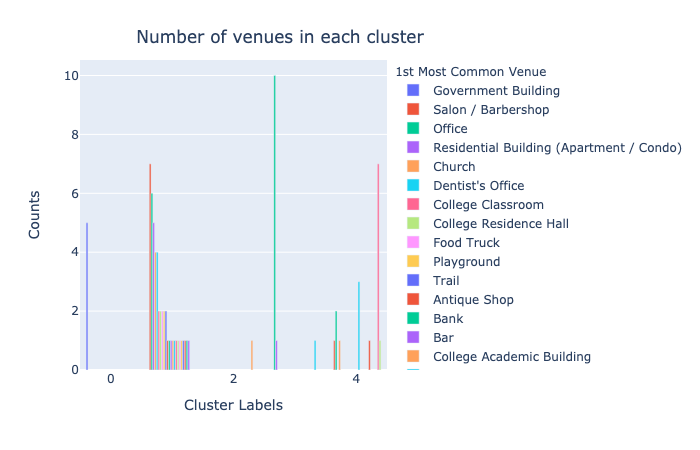

In [64]:
# plot the group bar chart
import plotly.express as px 

fig = px.bar(common_vaneus_cluster, x="Cluster Labels", y="Counts", 
             color="1st Most Common Venue", hover_data=['1st Most Common Venue'], 
             barmode = 'group') 

fig.update_layout(
    title={
        'text': "Number of venues in each cluster",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
# save figure
fig.write_image("../images/fig1.png")
# fig.show()
fig.show(renderer="png")

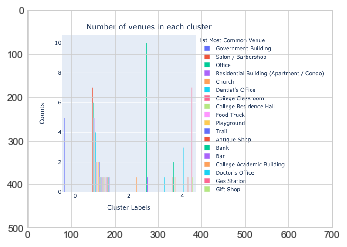

In [65]:
image = mpimg.imread("../images/fig1.png")
plt.imshow(image)
plt.show()

We have <b>5 clusters</b> of neighborhoods. Let's assign name to each cluster as follows: 
1. Cluster-0: <b>Zoo exhibit</b>  
- Cluster-1: <b>Multiple Venues - automotive shops, office, salon, doctor's place</b>       
- Cluster-2: <b>Government buildings, offices, salon, church</b>
- Cluster-3: <b>Multiple Venues - residential buildings, college and academic buidings, Salon, office, bank, restaurants, park, doctor's and dentist's place</b> 
- Cluster-4: <b>Collese classrooms and high school</b> 

In the above barchar, we have observed that <b>Cluster-1</b> and <b>Cluster-3</b> have multiple venues such as residential buildings, college and academic buidings, Salon, office, bank, restaurants and marketplace etc. In the following sections, we will perform explanatory data analysis and derive the following informations about each neighborhood of <b>Cluster-1</b> and <b>Cluster-3</b>:

- All the neighborhoods in <b>Cluster-1</b> and <b>Cluster-3</b>
- Number and category of restaurants in each Neighborhood
- Neighbors of each restaurant
- Population base: Foot or car traffic
- Parking
- Crime rate in the neighborhood

All these elements are as crucial to a restaurant's success as great food and service.

### E.1 Get all the neighborhoods in Cluster-1

In [61]:
clus1_neighborhoods = cluster1['Neighborhoods']
print("Number of neighborhoods in Cluster-1: {}\n".format(clus1_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-1:\n")
print(list(clus1_neighborhoods))

Number of neighborhoods in Cluster-1: 49

Neighborhoods in Cluster-1:

['Bay Ho', 'Bay Park', 'Carmel Valley', 'Del Mar Heights', 'Del Mar Mesa', 'La Jolla', 'La Jolla Village', 'Pacific Beach', 'Pacific Highlands Ranch', 'University City', 'Mission Valley East', 'Allied Gardens', 'Del Cerro', 'Serra Mesa', 'Tierrasanta', 'Downtown', 'Little Italy', 'Balboa Park', 'Golden Hill', 'Memorial', 'South Park', 'Alta Vista', 'Bay Terraces', 'Broadway Heights', 'Chollas View', 'Emerald Hills', 'Encanto', 'Jamacha', 'Lomita', 'Oak Park', 'Black Mountain Ranch', 'Mira Mesa', 'Rancho Peasquitos', 'Scripps Ranch', 'Torrey Highlands', 'Linda Vista', 'Mission Valley West', 'Morena', 'North Park', 'Ocean Beach', 'Old Town', 'Liberty Station', 'Sunset Cliffs', 'Wooded Area', 'University Heights', 'College Area', 'Kensington', 'Normal Heights', 'Webster']


#### Get the number and category of restaurants in each Neighborhood of Cluster-1

In [ ]:
# Create a new dataframe including neighborhoods of Cluster-1 and all the restaurants
clus1_neighbors = sd_venues[sd_venues['Neighborhoods'].isin(list(clus1_neighborhoods))]
print(clus1_neighbors.head())
clus1_restaurants = clus1_neighbors.loc[clus1_neighbors.Venue_Category.str.contains('Restaurant', na=False)].reset_index(drop=True)
clus1_restaurants.head()

In [ ]:
# get the total number of restaurants in Cluster-1
print("Total number of restaurants in Cluster-1: {}".format(clus1_restaurants.shape[0]))

In [ ]:
# Get the number of unique restaurant category
print("Number of unique restaurents category in Cluster-1: {}".format(len(clus1_restaurants['Venue_Category'].unique())))

In [ ]:
# Get all the unique restaurant category with numbers in Cluster-1
restaurant_category_clus1 = clus1_restaurants['Venue_Category'].value_counts().rename_axis('Restaurant Category').reset_index(name='Counts')
print("Top 5 Restaurant categories are:") 
restaurant_category_clus1.head(5)

In [ ]:
# visualize the restaurants using barchart
import plotly.express as px 
df = restaurant_category_clus1.sort_values(by="Counts", ascending=True, ignore_index=True)

fig = px.bar(df, x="Counts", y="Restaurant Category", orientation='h') 

fig.update_layout(
    title={
        'text': "Restaurant Category",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

colors = ['green', ] * df["Counts"].count()
colors[int(df[df["Counts"] == max(df["Counts"])].index[0])] = 'red'
fig.update_traces(marker=dict(color=colors, opacity=0.8))

fig.show()

Let's find the number of restaurants of each category in each neighborhood.

In [ ]:
# merge clus1_restaurants with sd_merged on 'Neighborhoods'
clus1_rest_df = sd_merged.join(clus1_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
clus1_rest_df.head(3)

In [ ]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster1 = clus1_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster1.head(5)

Let's plot the number of restaurants in each neighborhood of Cluster-1

In [ ]:
# plot a stack barchart to display the number of restaurants in Cluster-1 using Plotly visualization library
import plotly.express as px 

fig = px.bar(restaurants_cluster1, x="Neighborhoods", y="Counts", 
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack') 

fig.update_layout(
    title={
        'text': "Number of restaurants in Cluster-1",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_tickangle=-45,
    xaxis={'categoryorder':'category ascending'})
fig.show()

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

In [ ]:
# create a dataframe with neighborhoods which have no Italian restaurants (Cluster-1)
hoods_italian_rests = restaurants_cluster1[restaurants_cluster1['Restaurant Category'] == 'Italian Restaurant'].reset_index(drop=True)
list_italian_rests = hoods_italian_rests['Neighborhoods'].unique()

# filter the neighborhoods 
index_names = restaurants_cluster1[restaurants_cluster1['Neighborhoods'].isin(list(list_italian_rests))].index
hoods_no_italian_rests = restaurants_cluster1.drop(index_names)
list_no_italian_rests = hoods_no_italian_rests['Neighborhoods'].unique()

print("Neighborhoods with no Italian restaurants:")
print(list(list_no_italian_rests))
print('')
print("Number of neighborhoods with no Italian restaurants: {}".format(len(list_no_italian_rests)))

In [ ]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-1",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Ok, now we have <b>19</b> neighborhoods within <b>Cluster-0</b> that have no Italian restaurants. From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. Chollas View
- City Heights
- Grant Hill
- Islenair
- Lincoln Park
- Linda Vista
- Logan Heights
- Rolando Park
- Sherman Heights
- Talmadge
- Valencia Park

### E.2 Get all the neighborhoods in Cluster-2

In [ ]:
clus2_neighborhoods = cluster2['Neighborhoods']
print("Number of neighborhoods in Cluster-2: {}\n".format(clus2_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-2:\n")
print(list(clus2_neighborhoods))

#### Get the number and category of restaurants in each Neighborhood of Cluster-2

In [ ]:
# Create a new dataframe including neighborhoods of Cluster-2 and all the restaurants
clus2_neighbors = sd_venues[sd_venues['Neighborhoods'].isin(list(clus2_neighborhoods))]
print(clus2_neighbors.head())
clus2_restaurants = clus2_neighbors.loc[clus2_neighbors.Venue_Category.str.contains('Restaurant', na=False)].reset_index(drop=True)
clus2_restaurants.head()

In [ ]:
# get the total number of restaurants in Cluster-2
print("Total number of restaurants in Cluster-2: {}".format(clus2_restaurants.shape[0]))

In [ ]:
# Get the number of unique restaurant category
print("Number of unique restaurents category in Cluster-2: {}".format(len(clus2_restaurants['Venue_Category'].unique())))

In [ ]:
# Get all the unique restaurant category with numbers in Cluster-2
restaurant_category = clus2_restaurants['Venue_Category'].value_counts().rename_axis('Restaurant Category').reset_index(name='Counts')
print("Top 5 Restaurant categories are:") 
restaurant_category.head(5)

In [ ]:
# visualize the restaurants using barchart
import plotly.express as px 
df = restaurant_category.sort_values(by="Counts", ascending=True, ignore_index=True)

fig = px.bar(df, x="Counts", y="Restaurant Category", orientation='h') 

fig.update_layout(
    title={
        'text': "Restaurant Category",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

colors = ['green', ] * df["Counts"].count()
colors[int(df[df["Counts"] == max(df["Counts"])].index[0])] = 'red'
fig.update_traces(marker=dict(color=colors, opacity=0.8))

fig.show()

Let's find the number of restaurants of each category in each neighborhood.

In [ ]:
# merge clus2_restaurants with sd_merged on 'Neighborhoods'
rest_df = sd_merged.join(clus2_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
rest_df.head()

In [ ]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster = clus2_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster.head(5)

Let's plot the number of restaurants in each neighborhood of Cluster-2

In [ ]:
# plot a stack barchart to display the number of restaurants in Cluster-2 using Plotly visualization library
import plotly.express as px 

fig = px.bar(restaurants_cluster, x="Neighborhoods", y="Counts", 
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack') 

fig.update_layout(
    title={
        'text': "Number of restaurants in Cluster-2",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_tickangle=-45,
    xaxis={'categoryorder':'category ascending'})
fig.show()

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

In [ ]:
# create a dataframe with neighborhoods which have no Italian restaurants (Cluster-2)
hoods_italian_rests = restaurants_cluster[restaurants_cluster['Restaurant Category'] == 'Italian Restaurant'].reset_index(drop=True)
list_italian_rests = hoods_italian_rests['Neighborhoods'].unique()

# filter the neighborhoods 
index_names = restaurants_cluster[restaurants_cluster['Neighborhoods'].isin(list(list_italian_rests))].index
hoods_no_italian_rests = restaurants_cluster.drop(index_names)
list_no_italian_rests = hoods_no_italian_rests['Neighborhoods'].unique()

print("Neighborhoods with no Italian restaurants:")
print(list(list_no_italian_rests))
print('')
print("Number of neighborhoods with no Italian restaurants: {}".format(len(list_no_italian_rests)))

In [ ]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-2",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Ok, now we have <b>7</b> neighborhoods within <b>Cluster-2</b> that have <b>no Italian restaurants</b>.  From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. La Playa 
- Miramar
- Mission Valley East
- Mission Valley West
- Sorrento Valley

### E.3 Get all the neighborhoods in Cluster-3

In [ ]:
clus3_neighborhoods = cluster3['Neighborhoods']
print("Number of neighborhoods in Cluster-3: {}\n".format(clus3_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-3:\n")
print(list(clus3_neighborhoods))

#### Get the number and category of restaurants in each Neighborhood of Cluster-3

In [ ]:
# Create a new dataframe including neighborhoods of Cluster-3 and all the restaurants
clus3_neighbors = sd_venues[sd_venues['Neighborhoods'].isin(list(clus3_neighborhoods))]
print(clus3_neighbors.head())
clus3_restaurants = clus3_neighbors.loc[clus3_neighbors.Venue_Category.str.contains('Restaurant', na=False)].reset_index(drop=True)
clus3_restaurants.head()

In [ ]:
# get the total number of restaurants in Cluster-3
print("Total number of restaurants in Cluster-3: {}".format(clus3_restaurants.shape[0]))

In [ ]:
# Get the number of unique restaurant category
print("Number of unique restaurents category in Cluster-3: {}".format(len(clus3_restaurants['Venue_Category'].unique())))

In [ ]:
# Get all the unique restaurant category with numbers in Cluster-3
restaurant_category = clus3_restaurants['Venue_Category'].value_counts().rename_axis('Restaurant Category').reset_index(name='Counts')
print("Top 5 Restaurant categories are:") 
restaurant_category.head(5)

In [ ]:
# visualize the restaurants using barchart
import plotly.express as px 
df = restaurant_category.sort_values(by="Counts", ascending=True, ignore_index=True)

fig = px.bar(df, x="Counts", y="Restaurant Category", orientation='h') 

fig.update_layout(
    title={
        'text': "Restaurant Category",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

colors = ['green', ] * df["Counts"].count()
colors[int(df[df["Counts"] == max(df["Counts"])].index[0])] = 'red'
fig.update_traces(marker=dict(color=colors, opacity=0.8))

fig.show()

Let's find the number of restaurants of each category in each neighborhood.

In [ ]:
# merge clus3_restaurants with sd_merged on 'Neighborhoods'
rest_df = sd_merged.join(clus3_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
rest_df.head()

In [ ]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster = clus3_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster.head(5)
# len(restaurants_cluster['Neighborhoods'].unique())

Let's plot the number of restaurants in each neighborhood of Cluster-3

In [ ]:
# plot a stack barchart to display the number of restaurants in Cluster-3 using Plotly visualization library
import plotly.express as px 

fig = px.bar(restaurants_cluster, x="Neighborhoods", y="Counts", 
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack') 

fig.update_layout(
    title={
        'text': "Number of restaurants in Cluster-3",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_tickangle=-45,
    xaxis={'categoryorder':'category ascending'})
fig.show()

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

In [ ]:
# create a dataframe with neighborhoods which have no Italian restaurants (Cluster-3)
hoods_italian_rests = restaurants_cluster[restaurants_cluster['Restaurant Category'] == 'Italian Restaurant'].reset_index(drop=True)
list_italian_rests = hoods_italian_rests['Neighborhoods'].unique()

# filter the neighborhoods 
index_names = restaurants_cluster[restaurants_cluster['Neighborhoods'].isin(list(list_italian_rests))].index
hoods_no_italian_rests = restaurants_cluster.drop(index_names)
list_no_italian_rests = hoods_no_italian_rests['Neighborhoods'].unique()

print("Neighborhoods with no Italian restaurants:")
print(list(list_no_italian_rests))
print('')
print("Number of neighborhoods with no Italian restaurants: {}".format(len(list_no_italian_rests)))

In [ ]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-3",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Ok, now we have <b>24</b> neighborhoods within <b>Cluster-3</b> that have <b>no Italian restaurants</b>.  From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. Bankers Hill
- Clairemont
- Cortez Hill
- Del Cerro
- Del Mar Heights
- Del Mar Mesa
- Gaslamp Quarter
- Mira Mesa
- Morena
- Rancho Peasquitos
- Serra Mesa

### F. Importing and Merging demographical dataset

In this section, we will import <b>demographical</b> dataset and perform basic <b>exploratory data analysis</b> to get the <b>demographical information</b> such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>,   <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> of these selected <b>7</b> neighborhoods from <b>Cluster-0</b> and <b>14</b> neighborhoods from <b>Cluster-3</b>. Then, we will merge <b>demographical</b> dataset to the dataframe <b>sd_merged</b>. Finally, we will filter out <b>few most adequate neighborhoods</b> based on this new <b>merged dataset</b>.

In [ ]:
# let's create new dataframe with selected neighborhoods from Cluster-1 and Cluster-3

top_hoods = ['Chollas View', 'City Heights', 'Grant Hill', 'Islenair', 'Lincoln Park', 
            'Linda Vista', 'Logan Heights', 'Rolando Park', 'Sherman Heights', 'Talmadge', 
            'Valencia Park', 'La Playa', 'Miramar', 'Mission Valley East', 'Mission Valley West',
            'Sorrento Valley', 'Bankers Hill', 'Clairemont', 'Cortez Hill', 'Del Cerro', 
            'Del Mar Heights', 'Del Mar Mesa', 'Gaslamp Quarter', 'Mira Mesa', 'Morena',
            'Rancho Peasquitos', 'Serra Mesa']
print("Number of neighborhoods: {}".format(len(top_hoods)))
top_places = sd_merged[sd_merged['Neighborhoods'].isin(top_hoods)]
top_places.head(3)

In [ ]:
# check all the neiborhoods are present or not
print("Number of neighborhoods: {}".format(len(top_places['Neighborhoods'])))
print(list(top_places['Neighborhoods']))

#### Import demographical dataset

In [ ]:
# import San Diego demographical data
sd_demo = pd.read_csv("../data/san_diego_data.csv")
sd_demo.head()

In [ ]:
# Drop all the rows with missing value
sd_demo.dropna(axis=0, inplace=True, how ='any')
sd_demo.reset_index(drop=True)
print(sd_demo.shape)
# sd_demo.info()
sd_demo.head()

In [ ]:
# print the list of all the 12 neighborhoods
print("Filtered Neighborhoods:")
print(list(sd_demo['Neighborhoods']))

Now, we will create a new dataframe by summing up the ratings of features - <b>Diversity</b>, <b>Commute</b>, <b>Crime and Safety</b>, <b>Walkable to Restaurants</b>, and <b>Parking</b>; and add a new column <b>Overall Rating</b>.

In [ ]:
sd_demo['Overall Rating'] = sd_demo[["Diversity", "Commute", "Crime and Safety", "Walkable to Restaurants", "Parking"]].sum(axis=1)
sd_demo.head(12)

## 5. Results

### A. List of the top 12 Neighborhoods

In [ ]:
# print the list of 12 neighborhoods
print("Top 12 neighborhoods are: ")
print(list(sd_demo['Neighborhoods']))

### B. Create a barplot of 'Neighborhoods' vs 'Overall Rating'

In [ ]:
# create a barplot of 'Neighborhoods' vs 'Overall Rating'
import plotly.express as px 
hoods_rating = sd_demo.sort_values(by="Overall Rating", ascending=True, ignore_index=True)

fig = px.bar(hoods_rating, x="Overall Rating", y="Neighborhoods", orientation='h', text="Overall Rating") 

fig.update_layout(
    title={
        'text': "Neighborhoods vs Overall Rating",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.show()

### C. Create the final dataframe 'sd_selected_neiborhoods'

Let’s merge <b>demographical</b> information about these neighborhoods with <b>selected neighborhoods</b> data from <b>Cluster-0</b> and <b>Cluster-3</b> in our final dataframe '<b>sd_selected_neiborhoods</b>'.

In [ ]:
# merge 'sd_demo' to 'sd_merged' on 'Neighborhoods'
sd_selected_neiborhoods = sd_demo.join(sd_merged.set_index('Neighborhoods'), on='Neighborhoods').reset_index(drop=True)
print(sd_selected_neiborhoods.shape[0])
sd_selected_neiborhoods.head(3)

### D. Create a map of San Diego with the selected 12 neighborhoods superimposed on top

Now, let's create a map of San Diego using <b>folium</b> library, and display the map with the selected <b>12</b> neighborhoods superimposed on top. Note that <b>size of each circle</b> is corresponding to <b>overall rating</b>.

In [ ]:
# create map of San Diego using latitude and longitude values
sd_map = folium.Map(location=[32.7174202, -117.1627728], zoom_start=10)
# ratings = 

# add markers to map
for lat, lng, neighborhood, i in zip(sd_selected_neiborhoods['Latitude'], sd_selected_neiborhoods['Longitude'], 
                                     sd_selected_neiborhoods['Neighborhoods'], sd_selected_neiborhoods['Overall Rating']):
    label = '{}\nRating: {:0.2f}'.format(neighborhood, i)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=float(i/5),
        popup=label,
        color='red',
        fill=True,
        fill_color='royalblue',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(sd_map)

# display the map
sd_map

## 6. Discussion

As I mentioned before, being so attractive economically and geographically, San Diego draws in people like a magnet. Business owners often consider San Diego city as a good destination for moving and expanding their business because of housing and low cost of doing business as compared to Los Angeles and San Francisco areas. Also, its year-around good weather tremendously helps small businessess that rely on foot traffic.

I have used <b>exploratory data analysis</b> and <b><i>K</i>-means clustering</b> algorithm for modeling in order to discover a few precise locations for opening up an <b>Italian</b> restaurant considering following elements:
- Know the neighborhood, specifically, who else is doing business in the neighborhood
- Find a place which is not crowded with similar restaurants in vicinity
- Accessibility and visibility of the location
- Population base to know the foot traffic or car traffic in the area to support the business
- Parking
- Diversity (based on ethnic and economic diversity)
- Commute
- Crime and Safety (based on violent and property crime rates)

I used the <b><i>K</i>-means clustering</b> algorithm as part of this clustering study. I have set the optimum k value to 5 based on the methods (Elbow method, Silhouette Method, square root of the number of data points divided by two). 

I have assigned name to each cluster as follows: 
1. Cluster-0: <b>Multiple Venues - office, residential buildings, salon, government buildings restaurantsm, doctor's place</b>     
- Cluster-1: <b>Zoo exhibit</b>   
- Cluster-2: <b>Automotive shops, salon, church</b>
- Cluster-3: <b>Multiple Venues - residential buildings, college and academic buidings, Salon, office, bank, restaurants, park, doctor's and dentist's place</b>   

have observed that <b>Cluster-1</b>, <b>Cluster-2</b>, and <b>Cluster-3</b> have multiple venues such as residential buildings, college and academic buidings, Salon, office, bank, restaurants and marketplace etc. Then, I have performed explanatory data analysis and derived relevant informations about each neighborhood of <b>Cluster-1</b>, <b>Cluster-1</b>, and <b>Cluster-3</b> as follows:
- Number of neighborhoods in Cluster-1: 24
- Total number of restaurants in Cluster-1: 215
- Number of unique restaurents category in Cluster-1: 27
- Number of neighborhoods with no Italian restaurants in Cluster-1: 19
- Number of neighborhoods in Cluster-2: 17
- Total number of restaurants in Cluster-2: 80
- Number of unique restaurents category in Cluster-2: 19
- Number of neighborhoods with no Italian restaurants in Cluster-2: 7
- Number of neighborhoods in Cluster-3: 39
- Total number of restaurants in Cluster-3: 241
- Number of unique restaurents category in Cluster-3: 34
- Number of neighborhoods with no Italian restaurants in Cluster-3: 24

Then, I have selected <b>11</b> neighborhoods from <b>Cluster-1</b>, <b>5</b> neighborhoods from <b>Cluster-2</b> and <b>11</b> neighborhoods from <b>Cluster-3</b> having restaurants of 4 or more different categories, but have no Italian retaurants.

Then, I have imported <b>demographical</b> dataset and perform basic <b>exploratory data analysis</b> to get the <b>demographical information</b> such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>,   <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> of these selected <b>11</b> neighborhoods from <b>Cluster-1</b>, <b>5</b> neighborhoods from <b>Cluster-2</b> and <b>11</b> neighborhoods from <b>Cluster-3</b>. Then, I have merged <b>demographical</b> dataset to the dataframe <b>sd_merged</b> to get the final dataframe.

I have discovered following <b>12</b> neighborhoods based on the analysis: 
- <b>Mission Valley East</b> 
- <b>Mission Valley West</b>
- <b>Otay Mesa</b>
- <b>Miramar</b>
- <b>Linda Vista</b>
- <b>Rancho Peasquitos</b>
- <b>Normal Heights</b>
- <b>Serra Mesa</b>
- <b>Golden Hill</b>
- <b>Mira Mesa</b>
- <b>Clairemont</b>
- <b>Torrey Highlands</b>

Finally, I ended the study by visualizing the these <b>12</b> neighborhoods along with their demographic overall rating information on the San Diego map.

## 7. Conclusion

Objective of this project was to discover a few promising neighborhoods of San Diego with having no <b>Italian</b> restaurants in the vicinity so that the stakeholders can select a optimal location for opening up a new <b>Italian Restaurant</b>.

By using Foursquare API, basic exploratory data analysis, and <b><i>K</i>-means clustering</b> algorithm, we have first identified some neighborhoods of two selected clusters of interest (containing multiple venues nearby). Then, we have explored these two clusters to find out the locations which satisfy some basic requirements of this project. Then, I have merged demographical information of San Diego with these chosen neighborhoods to find more precise locations for an Italian restaurant. 

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics and locations of these neighborhoods.